In [1]:
# Imports
import os
import time
import logging
import argparse
from tqdm.auto import tqdm
import snapatac2 as snap
import scanpy as sc

In [2]:
# Define paths
input_h5ad_path = "/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/23Oct23/MM168/snap_mem.h5ad"

In [4]:
# Load in the adata
adata = sc.read_h5ad(input_h5ad_path)
adata

AnnData object with n_obs × n_vars = 6081 × 606219
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'scrublet_sim_doublet_score'
    obsm: 'insertion'

In [1]:
snap.tl.spectral(adata)


KeyboardInterrupt



In [6]:
snap.tl.umap(adata)

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cellar/users/aklie/opt/mi

In [7]:
snap.pp.knn(adata, use_rep="X_spectral")

In [8]:
snap.tl.leiden(adata)

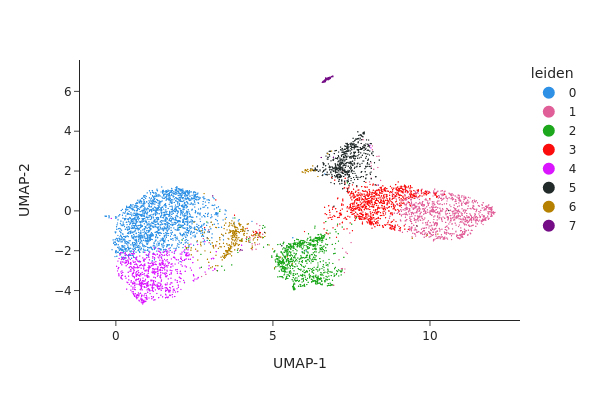

In [10]:
snap.pl.umap(adata, color="leiden", interactive=False)

In [11]:
gene_matrix = snap.pp.make_gene_matrix(
    adata=adata,
    gene_anno=snap.genome.hg38
)

In [14]:
# Clean up the gene matrix
sc.pp.filter_genes(gene_matrix, min_cells=3)
sc.pp.normalize_total(gene_matrix)
sc.pp.log1p(gene_matrix)

In [17]:
sc.external.pp.magic(gene_matrix, solver="approximate")

In [18]:
gene_matrix.obsm["X_umap"] = adata.obsm["X_umap"]

In [ ]:
sc.pl.

In [19]:
gene_matrix

AnnData object with n_obs × n_vars = 6081 × 59623
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells'
    uns: 'log1p'
    obsm: 'X_umap'

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



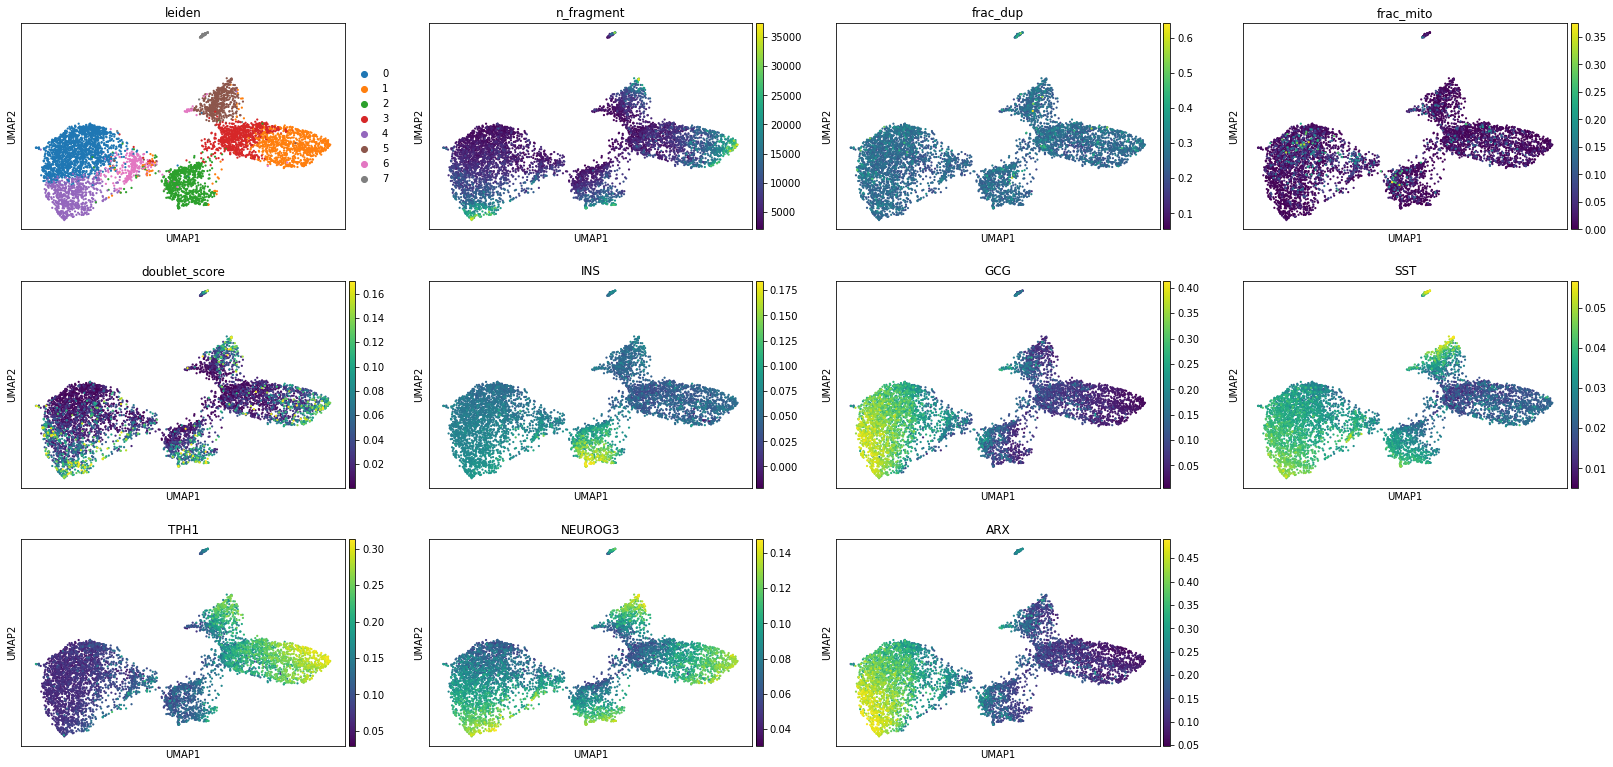

In [25]:
marker_genes = ['INS', 'GCG', 'SST', 'TPH1', 'NEUROG3', 'ARX']
sc.pl.umap(gene_matrix, use_raw=False, color=["leiden", "n_fragment", "frac_dup", "frac_mito", "doublet_score"] + marker_genes)

In [21]:
gene_matrix

AnnData object with n_obs × n_vars = 6081 × 59623
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells'
    uns: 'log1p', 'leiden_colors'
    obsm: 'X_umap'

In [26]:
gene_matrix.write("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/23Oct23/MM168/snap_mem_gene_matrix.h5ad")